## How are in-demand skills trending for Data Analysts in India?

### Methodology
1. Aggregate skill counts monthly
2. Analyze based on percentage of total jobs for data analysts
3. Plot the monthly skill demand

### Libraries Importation and Data Cleaning

In [6]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)
df_india = df[df['job_country'] == 'India'].copy()
df_india_da = df_india[df_india['job_title_short'] == 'Data Analyst']

### Skill Aggregation per Month

In [7]:
df_skills = df_india_da.explode('job_skills')
df_skills['job_posted_month'] = df_skills['job_posted_date'].dt.to_period ('M')
df_pivot = df_skills.pivot_table(index= 'job_posted_month', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
df_pivot.loc['total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]
df_pivot = df_pivot.drop('total')
df_pivot.index = df_pivot.index.astype('period[M]')
df_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2023-02,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
2023-03,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
2023-04,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
2023-05,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
2023-06,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
2023-07,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
2023-08,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
2023-09,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


### Skill Count Percentage per Month

In [8]:
df_total = df_skills.groupby('job_posted_month').size()
df_skill_percentage = df_pivot.iloc[:12].div(df_total/100, axis=0)
df_skill_percentage

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
2023-01,13.045338,9.238666,9.324209,6.800684,4.191617,3.806672,5.474765,1.967494,1.368691,1.839179,...,0.000000,0.000000,0.000000,0.00000,0.042772,0.000000,0.00000,0.000000,0.000000,0.000000
2023-02,12.743902,9.024390,9.512195,7.073171,4.573171,4.085366,5.000000,1.585366,2.012195,1.524390,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2023-03,13.160920,8.678161,7.931034,7.183908,4.367816,3.333333,3.563218,2.586207,2.183908,1.666667,...,0.000000,0.000000,0.057471,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2023-04,12.553846,8.800000,8.492308,6.030769,5.107692,3.446154,3.200000,2.461538,1.907692,1.723077,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2023-05,14.405204,9.386617,9.851301,6.598513,5.669145,3.903346,2.788104,3.066914,2.044610,1.765799,...,0.000000,0.092937,0.000000,0.00000,0.000000,0.000000,0.00000,0.092937,0.000000,0.000000
2023-06,12.987887,10.094213,7.738896,7.671602,5.181696,5.114401,4.979812,2.489906,2.153432,1.615074,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.067295
2023-07,13.468939,8.851017,9.565695,6.816932,5.112699,3.683342,4.288070,2.144035,1.704233,1.704233,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2023-08,12.917685,8.801956,7.823961,6.193969,5.175224,4.563977,3.993480,2.118989,2.567237,1.629992,...,0.000000,0.000000,0.000000,0.04075,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2023-09,14.249896,9.569578,9.527789,8.148767,7.020476,4.178855,3.844547,1.462599,1.713331,1.211868,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


### Monthly Skill Demand Plot

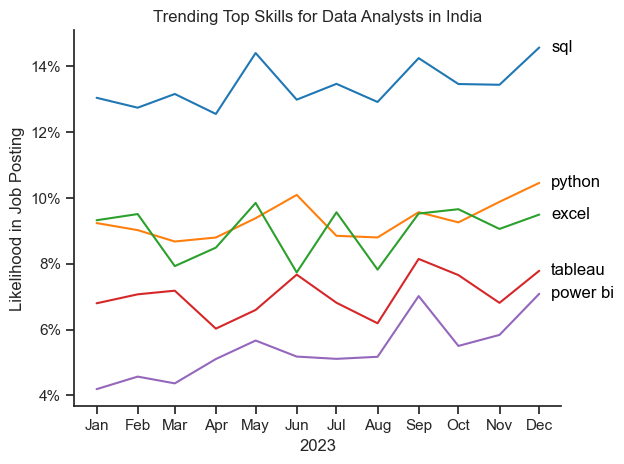

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_skill_percentage.iloc[:, :5]
df_plot.index = df_plot.index.to_timestamp()
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xticks(
    ticks=df_plot.index, 
    labels=[p.strftime('%b') for p in df_plot.index], 
    rotation=0
)

for i in range(5):
    plt.text(
        df_plot.index[-1] + pd.Timedelta(days=9),  # move 0.5 month (~15 days) to the right
        df_plot.iloc[-1, i], 
        df_plot.columns[i], 
        color='black',
        va='center'  # keeps it vertically centered
    )


plt.tight_layout()

plt.show()